In [1]:
import pandas as pd
from glob import glob as lsfiles
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import os
import matplotlib as mpl


from matplotlib import font_manager as fm, rcParams
fpath_reg = os.path.join(mpl.get_data_path(), "/Library/Fonts/RobotoCondensed-Regular.ttf")
prop_reg = fm.FontProperties(fname=fpath_reg)
fpath_light = os.path.join(mpl.get_data_path(), "/Library/Fonts/RobotoCondensed-light.ttf")
prop_light = fm.FontProperties(fname=fpath_light)

pd.options.mode.chained_assignment = None  # default='warn'



In [280]:
df_hosp = pd.read_pickle('df_all_hosp.pkl')
df_death = pd.read_pickle('df_all_death.pkl')
df_case = pd.read_pickle('df_all_case.pkl')

In [281]:
#df_hosp['WIS_normalized'] = df_hosp['WIS']/df_hosp['Population']
#df_death['WIS_normalized'] = df_death['WIS']/df_death['Population']
df_case['WIS_normalized'] = df_case['WIS']/df_case['Population']

In [282]:
df_hosp = df_hosp.rename(columns= {"WIS_normalized":"values","Model":"group"})
df_death = df_death.rename(columns= {"WIS_normalized":"values","Model":"group"})
df_case = df_case.rename(columns= {"WIS_normalized":"values","Model":"group"})


In [272]:
df_case.head()

,group,WIS,50% Coverage,95% Coverage,Location,Population,values
0,Ensemble,13296.525920,0.555556,0.888889,Alabama,4903185,0.002712
1,Ensemble_LOP,12168.517187,0.888889,1.000000,Alabama,4903185,0.002482
2,Ensemble_LOP_untrimmed,14887.529427,0.888889,1.000000,Alabama,4903185,0.003036
3,JHU_IDD-CovidSP,13540.737598,0.444444,1.000000,Alabama,4903185,0.002762
4,MOBS_NEU-GLEAM_COVID,8999.829219,0.333333,0.666667,Alabama,4903185,0.001836


In [283]:
df_hosp.drop(df_hosp[df_hosp.group == 'NotreDame-FRED'].index, inplace=True)
df_hosp.drop(df_hosp[df_hosp.group == 'UTA-ImmunoSEIRS'].index, inplace=True)


df_death.drop(df_death[df_death.group == 'NotreDame-FRED'].index, inplace=True)
df_death.drop(df_death[df_death.group == 'UTA-ImmunoSEIRS'].index, inplace=True)


df_case.drop(df_case[df_case.group == 'NotreDame-FRED'].index, inplace=True)
df_case.drop(df_case[df_case.group == 'UTA-ImmunoSEIRS'].index, inplace=True)


In [273]:
df_case.group.unique()

['Ensemble', 'Ensemble_LOP', 'Ensemble_LOP_untrimmed', 'JHU_IDD-CovidSP', 'MOBS_NEU-GLEAM_COVID', ..., 'USC-SIkJalpha', 'UVA-EpiHiper', 'UVA-adaptive', 'UTA-ImmunoSEIRS', 'NotreDame-FRED']
Length: 11
Categories (11, object): ['MOBS_NEU-GLEAM_COVID', 'Ensemble', 'Ensemble_LOP', 'Ensemble_LOP_untrimmed', ..., 'UVA-EpiHiper', 'NotreDame-FRED', 'USC-SIkJalpha', 'UTA-ImmunoSEIRS']

In [284]:
models = list(df_case.group.unique())
allmed = []
for model in models:
    med = df_case[df_case['group']== model]['WIS'].median()
    allmed.append(med)

In [285]:
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

In [286]:
#df_hosp.group = df_hosp.group.astype("category")
#df_hosp.group = df_hosp.group.cat.set_categories(modelorder)
#df_hosp.sort_values(["group"])


#df_death.group = df_death.group.astype("category")
#df_death.group = df_death.group.cat.set_categories(modelorder)
#df_death.sort_values(["group"])


df_case.group = df_case.group.astype("category")
df_case.group = df_case.group.cat.set_categories(modelorder)
df_case.sort_values(["group"])

,group,WIS,50% Coverage,95% Coverage,Location,Population,values
233,MOBS_NEU-GLEAM_COVID,12281.423016,0.222222,0.666667,Missouri,6626371,0.001853
314,MOBS_NEU-GLEAM_COVID,1374.252915,0.444444,0.666667,North Dakota,762062,0.001803
305,MOBS_NEU-GLEAM_COVID,34362.903940,0.111111,0.444444,North Carolina,10488084,0.003276
40,MOBS_NEU-GLEAM_COVID,85116.296581,0.333333,0.555556,California,39512223,0.002154
296,MOBS_NEU-GLEAM_COVID,28195.261578,0.222222,0.444444,New York,19453561,0.001449
...,...,...,...,...,...,...,...
425,USC-SIkJalpha,50175.067121,0.000000,0.111111,Virginia,8535519,0.005878
235,USC-SIkJalpha,110475.651440,0.111111,0.222222,Missouri,6626371,0.016672
325,USC-SIkJalpha,49939.807744,0.000000,0.111111,Ohio,11689100,0.004272
352,USC-SIkJalpha,91537.014512,0.000000,0.000000,Pennsylvania,12801989,0.00715


In [287]:
models = list(df_case.group.unique())
allmed = []
for model in models:
    med = df_case[df_case['group']== model]['values'].median()
    allmed.append(med)
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]
df_case.group = df_case.group.astype("category")
df_case.group = df_case.group.cat.set_categories(modelorder)
df_case.sort_values(["group"])

,group,WIS,50% Coverage,95% Coverage,Location,Population,values
233,MOBS_NEU-GLEAM_COVID,12281.423016,0.222222,0.666667,Missouri,6626371,0.001853
278,MOBS_NEU-GLEAM_COVID,13262.868563,0.111111,0.444444,New Jersey,8882190,0.001493
77,MOBS_NEU-GLEAM_COVID,1334.078196,0.222222,0.666667,District of Columbia,705749,0.00189
287,MOBS_NEU-GLEAM_COVID,7524.906248,0.111111,0.444444,New Mexico,2096829,0.003589
296,MOBS_NEU-GLEAM_COVID,28195.261578,0.222222,0.444444,New York,19453561,0.001449
...,...,...,...,...,...,...,...
98,USC-SIkJalpha,22127.356256,0.222222,0.888889,Georgia,10617423,0.002084
425,USC-SIkJalpha,50175.067121,0.000000,0.111111,Virginia,8535519,0.005878
235,USC-SIkJalpha,110475.651440,0.111111,0.222222,Missouri,6626371,0.016672
226,USC-SIkJalpha,11631.754792,0.000000,0.555556,Mississippi,2976149,0.003908


In [197]:
def create_penguin_plots(data,kde_args, title ,color = "#49AFB7",color_category=None, group2name = None):
    
    """
    input:
    data (pandas dataframe): with the two columns named group and values
    kde_args (dictionary): contains information for the kde (lw is the line with, bw_adjust changes the smoothing), look up these args in seaborns kde plots to get more info
    color category: colors the dots different colors depending other whether you want to show that
    group2name (dict): keys are the groups (whatever is in the group column) and values are the "names"
    
    output: fig/ax of figure
    """


    total_groups = data.group.unique().shape[0]
    total_min = 0 #data['values'].min()
    total_max = data['values'].max()*1.2


    fig, ax = plt.subplots(total_groups*2,1,figsize = (22,total_groups*2.3),tight_layout = False)
    plt.subplots_adjust(hspace=-.08)

    i = 0
    for group, df in data.groupby("group"):


        values = df["values"].values # this is the list of values you are showing in your distribution
        print(group,np.median(values))


        #distribution
        sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
        #sns.distplot(US_values, ax = ax[i],hist = False,
        #      kde_kws={"shade":False,"lw":"3"},color = "w")

        min_,max_ = ax[i].get_ylim()

        ax[i].set_ylim(ymin = 0, ymax = max_*1.1)


        sns.boxplot(values,ax = ax[i+1],color = color, showfliers = False, linewidth=1)
        for patch in ax[i+1].patches:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .1))
            #fc = patch.get_facecolor()
            #patch.set_facecolor(mpl.colors.to_rgba(fc, 0.1))

        if color_category:
            cmap = mpl.cm.get_cmap('Set2', df.continent_label.unique().shape[0])
            ci = 0
            for cont, df_cont in df.groupby(color_category):
                sns.swarmplot(df_cont['values'].values,ax = ax[i+1],color = cmap(ci),alpha = .9,label = cont)
                ci+=1
            if i+1 ==1:
                ax[i+1].legend(loc = 1, prop= prop_light)
        else:
            sns.swarmplot(values,ax = ax[i+1],color = color,alpha = .35,) 

        ax[i].axis("off")
        ax[i+1].axis("off")

        ax[i+1].set_xlim(xmin = total_min,xmax = total_max,)
        ax[i].set_xlim(xmin = total_min,xmax = total_max)

        ax[i+1].set_ylim(-.6,.5)
        #if i != 6:
        #    ax[i+1].hlines(y = -.6,xmin = total_min,xmax = total_max,linewidth = 2,zorder = 100,color = "#49AFB7")

        text = "%s"
        if group2name:
            ax[i].text(.03,0,group2name[group],transform=ax[i].transAxes,  horizontalalignment= "right",\
               fontsize = 14, verticalalignment='center',backgroundcolor = "w")
        else:
            ax[i].text(.0001,0,group,transform=ax[i].transAxes,  horizontalalignment= "right",\
               fontsize = 14, verticalalignment='center',backgroundcolor = "w")
        i +=2
    last = i+1-2
    ax[last].axis("on")
    ax[last].spines["top"].set_visible(False)
    ax[last].spines["left"].set_visible(False)
    ax[last].spines["right"].set_visible(False)
    ax[last].set_facecolor("none")


    #Test
    ticks = ax[last].get_xticks()
    print(ticks)
    #ax[last-1].set_xticks([round(i,4) for i in ticks])
    #ax[last].set_xticklabels(["{:,}".format(int(i)) for i in ticks],  fontsize = 16)
    #ax[last-1].set_xticklabels([round(i,4) for i in ticks],  fontsize = 16)
    
    for t in ticks:
        if t != 0:
            for ii in range(total_groups*2):
                ax[ii].axvline(x = t,ymin = 0,ymax= 1,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
                #ax[ii].vlines(x = t+5000,ymin = -.5,ymax= .444,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
    plt.suptitle(title, fontsize=20)
    return fig, ax



Ensemble 3.792883655416876e-05


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

JHU_IDD-CovidSP 4.246993134880944e-05
Ensemble_LOP 4.6403511704986715e-05
Ensemble_LOP_untrimmed 5.976641701953957e-05
MOBS_NEU-GLEAM_COVID 7.588517825693285e-05
UNCC-hierbin 0.00012301318974667692
UVA-EpiHiper 0.00015154669434150634
UVA-adaptive 0.00015779592863886992
USC-SIkJalpha 0.00027849053371689056
[0.     0.0002 0.0004 0.0006 0.0008 0.001 ]


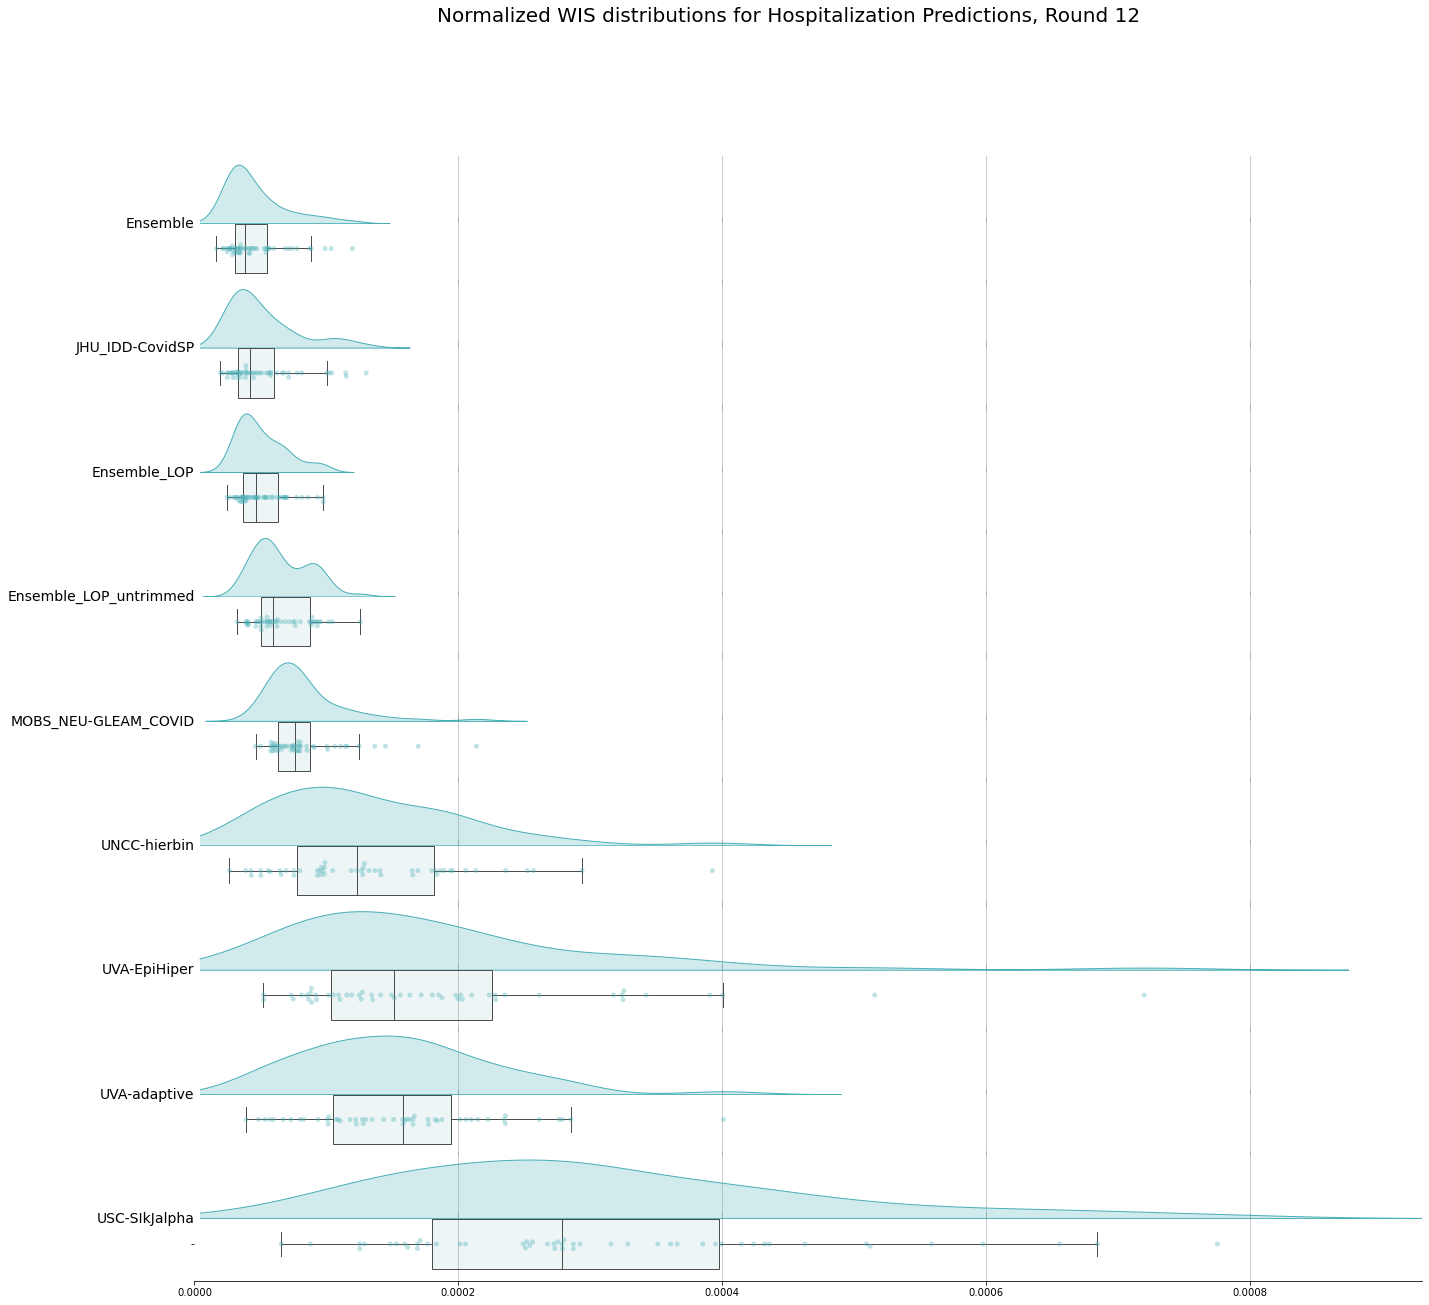

In [251]:

fig, ax_mat = create_penguin_plots(df_hosp,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Hospitalization Predictions, Round 12')
plt.savefig('penguinplot_hosp.pdf')

UVA-EpiHiper 1.476916810631747e-05
MOBS_NEU-GLEAM_COVID 1.4886838854955468e-05
Ensemble_LOP 1.504244670247285e-05
Ensemble_LOP_untrimmed 1.5310379076483217e-05
Ensemble 1.6688540839199143e-05
JHU_IDD-CovidSP 1.7546883421830166e-05
UNCC-hierbin 3.0579376655803945e-05
UVA-adaptive 3.5303084719133724e-05
USC-SIkJalpha 4.027586506153945e-05
[0.0e+00 5.0e-05 1.0e-04 1.5e-04 2.0e-04 2.5e-04 3.0e-04]


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

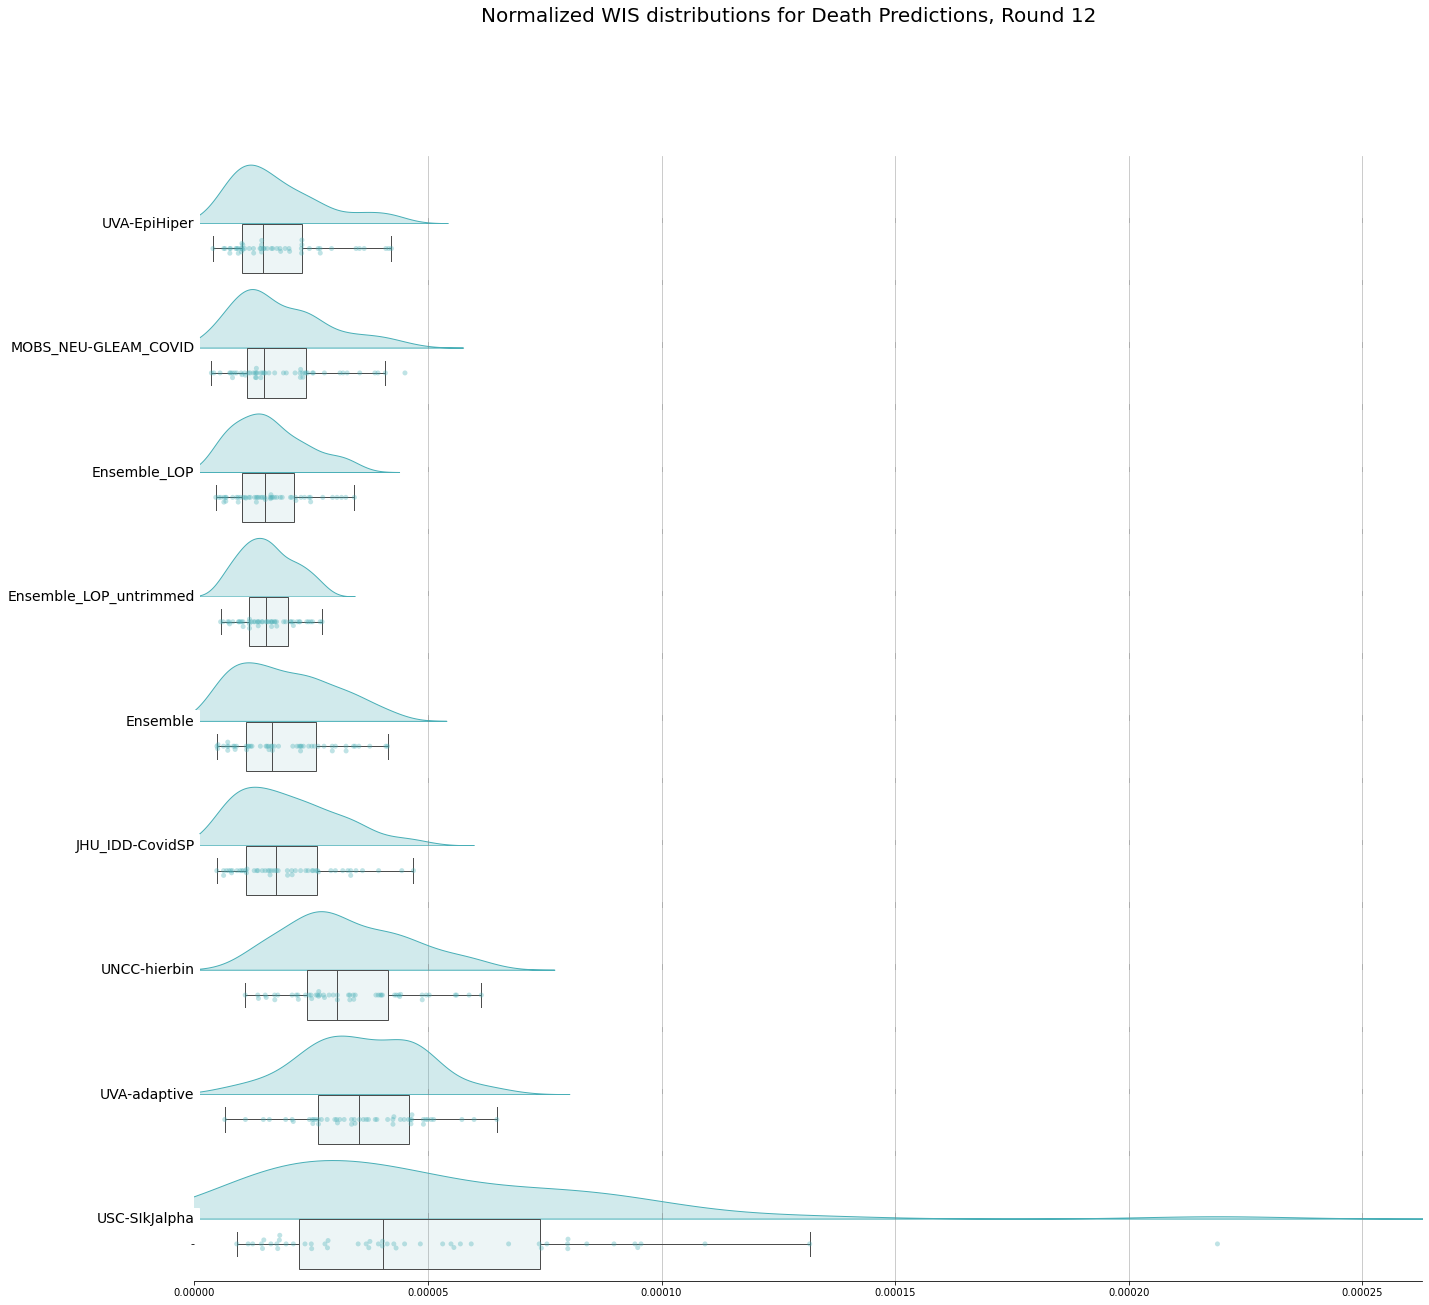

In [261]:
fig, ax_mat = create_penguin_plots(df_death,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Death Predictions, Round 12')
plt.savefig('penguinplot_death.pdf')

MOBS_NEU-GLEAM_COVID 0.002191479851865544
Ensemble_LOP 0.0031477793237522527
Ensemble 0.0032160132619772496
Ensemble_LOP_untrimmed 0.003460414723853701
JHU_IDD-CovidSP 0.004241009951909526
UNCC-hierbin 0.005816155502434293
UVA-EpiHiper 0.006278155552804845
UVA-adaptive 0.0068081585526173875
USC-SIkJalpha 0.011363547288886923
[0.   0.01 0.02 0.03 0.04 0.05 0.06]


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

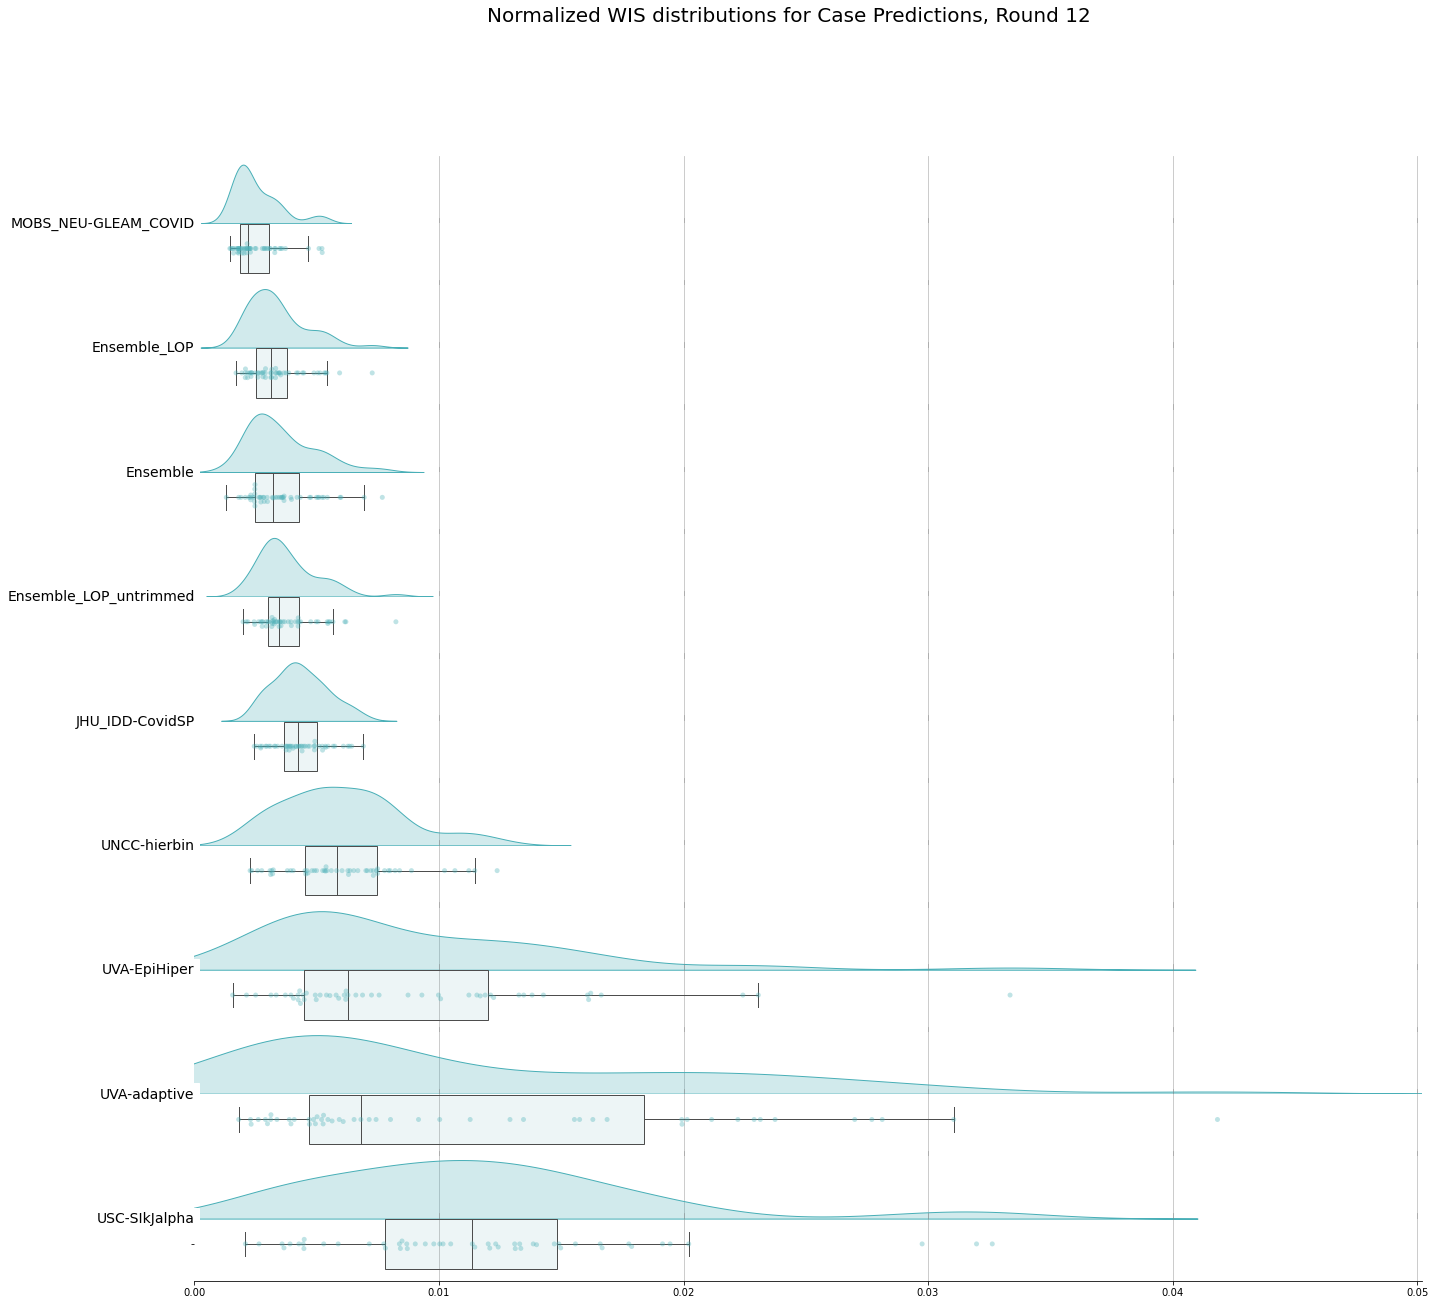

In [288]:
fig, ax_mat = create_penguin_plots(df_case,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Case Predictions, Round 12')
plt.savefig('penguinplot_case.pdf')